# Feature Selection

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt  # Matlab-style plotting
# Make sure plot shows immediately
%matplotlib inline 
import seaborn as sns # Library for plotting
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
def show_stt(df):
    print("Shape: ", df.shape)
    print("Dtypes: ", df.dtypes)
    print("Describe: \n", df.describe())
    print("Unique value: ")
    ls = list(filter(lambda i : df[i].dtype == 'object', list(df.columns)))
    for i in ls:
        print("[{}]: {}".format(i, df[i].unique()))
    return df.sample(5)

# Strategy A

In [4]:
df_a_train = pd.read_csv("./processed/DatasetATrain.csv", index_col=["MemberID"])
df_a_test = pd.read_csv("./processed/DatasetATest.csv", index_col=["MemberID"])

In [5]:
show_stt(df_a_train)

Shape:  (76038, 121)
Dtypes:  AgeAtFirstClaim      int64
Sex                 object
ClaimCount         float64
ProviderID         float64
Vendor             float64
                    ...   
DrugCountAvg       float64
DrugCountStd       float64
DrugCountSum       float64
DrugClaimCount     float64
DaysInHospital     float64
Length: 121, dtype: object
Describe: 
        AgeAtFirstClaim    ClaimCount    ProviderID        Vendor  \
count     76038.000000  76038.000000  76038.000000  76038.000000   
mean         45.643731     11.384952      4.404127      3.705805   
std          26.795079     10.555889      3.341382      2.615952   
min          -1.000000      1.000000      0.000000      0.000000   
25%          25.000000      3.000000      2.000000      2.000000   
50%          45.000000      8.000000      3.000000      3.000000   
75%          65.000000     16.000000      6.000000      5.000000   
max          85.000000     43.000000     27.000000     19.000000   

                PCP  

,AgeAtFirstClaim,Sex,ClaimCount,ProviderID,Vendor,PCP,SpecialtyCount_Surgery,SpecialtyCount_Rehabilitation,SpecialtyCount_Diagnostic Imaging,SpecialtyCount_Emergency,...,LabCountStd,LabCountSum,LabClaimCount,DrugCountMin,DrugCountMax,DrugCountAvg,DrugCountStd,DrugCountSum,DrugClaimCount,DaysInHospital
MemberID,,,,,,,,,,,,,,,,,,,,,
34815048,75,M,21.0,7.0,6.0,1.0,4.0,0.0,1.0,0.0,...,3.21455,10.0,3.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0
13032247,55,F,9.0,5.0,4.0,1.0,1.0,0.0,0.0,0.0,...,NaN,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
56109660,55,F,6.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,...,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37182450,15,F,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,0.0
34058629,15,F,2.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,0.0


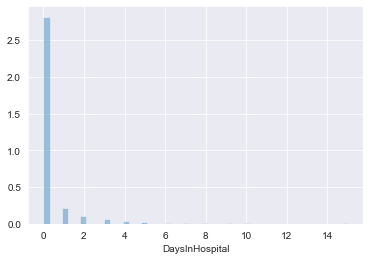

In [6]:
sns.distplot(df_a_train["DaysInHospital"])

In [7]:
missing_rate = df_a_train.isnull().sum() / df_a_train.shape[0]
missing_rate

AgeAtFirstClaim    0.000000
Sex                0.183172
ClaimCount         0.000000
ProviderID         0.000000
Vendor             0.000000
                     ...   
DrugCountAvg       0.344565
DrugCountStd       0.474000
DrugCountSum       0.344565
DrugClaimCount     0.344565
DaysInHospital     0.000000
Length: 121, dtype: float64

In [8]:
need_remove = missing_rate[missing_rate != 0]
need_remove

Sex               0.183172
PayDelayStd       0.092204
DSFSMin           0.000237
DSFSMax           0.000237
LabCountMin       0.299995
LabCountMax       0.299995
LabCountAvg       0.299995
LabCountStd       0.619743
LabCountSum       0.299995
LabClaimCount     0.299995
DrugCountMin      0.344565
DrugCountMax      0.344565
DrugCountAvg      0.344565
DrugCountStd      0.474000
DrugCountSum      0.344565
DrugClaimCount    0.344565
dtype: float64

In [9]:
def one_hot_encode(df, column, params=None, drop=False):
    df[column].fillna("NaN", inplace=True)
    if params == None:
        value_count = df[column].value_counts()

        category = list(value_count.index)
        max_category = category[np.argmax(value_count)]
        if drop:
            category.remove(max_category)
        
        for index in category:
            column_name = "{}_{}".format(column, index)
            df[column_name] = 0
            df.loc[df[column] == index, column_name] = 1

        df.drop(columns=[column], inplace=True)
        return { "category": list(value_count.index), "drop": max_category }
    else:
        category = params["category"]
        is_drop = params["drop"]
        if drop:
            category.remove(drop)

        for index in category:
            column_name = "{}_{}".format(column, index)
            df[column_name] = 0
            df.loc[df[column] == index, column_name] = 1

        df.drop(columns=[column], inplace=True)
        return params

In [10]:
sex_param = one_hot_encode(df_a_train, "Sex")

In [11]:
sex_param

{'category': ['F', 'M', 'NaN'], 'drop': 'F'}

In [12]:
df_a_train

,AgeAtFirstClaim,ClaimCount,ProviderID,Vendor,PCP,SpecialtyCount_Surgery,SpecialtyCount_Rehabilitation,SpecialtyCount_Diagnostic Imaging,SpecialtyCount_Emergency,SpecialtyCount_Internal,...,DrugCountMin,DrugCountMax,DrugCountAvg,DrugCountStd,DrugCountSum,DrugClaimCount,DaysInHospital,Sex_F,Sex_M,Sex_NaN
MemberID,,,,,,,,,,,,,,,,,,,,,
210,35,8.0,4.0,4.0,2.0,0.0,0.0,0.0,2.0,4.0,...,1.0,2.0,1.666667,0.577350,5.0,3.0,0.0,0,0,1
3197,5,5.0,3.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,...,1.0,2.0,1.250000,0.500000,5.0,4.0,0.0,1,0,0
3889,-1,13.0,7.0,7.0,1.0,0.0,0.0,1.0,4.0,4.0,...,2.0,5.0,3.000000,0.816497,30.0,10.0,0.0,1,0,0
4187,55,4.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,2.0,...,3.0,7.0,6.100000,1.449138,61.0,10.0,0.0,1,0,0
9063,65,4.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,3.0,...,1.0,1.0,1.000000,0.000000,2.0,2.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995554,45,35.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,26.0,...,1.0,4.0,2.000000,1.414214,8.0,4.0,0.0,0,1,0
99996214,45,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1,0
99997485,15,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1,0


In [13]:
df_a_train["PayDelayStd"].fillna(-1.0, inplace=True)
df_a_train["LabCountStd"].fillna(-1.0, inplace=True)
df_a_train["DrugCountStd"].fillna(-1.0, inplace=True)
df_a_train.fillna(0.0, inplace=True)

In [17]:
d1 = df_a_train.sample(10000)
cor = d1[d1.columns.difference(['DaysInHospital'])].corr().abs()
cor

,AgeAtFirstClaim,CharlsonIndexAvg,CharlsonIndexMax,CharlsonIndexMin,ClaimCount,DSFSMax,DSFSMin,DrugClaimCount,DrugCountAvg,DrugCountMax,...,SpecialtyCount_Internal,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan,Vendor
AgeAtFirstClaim,1.000000,0.318469,0.322416,0.185983,0.318933,0.309591,0.031037,0.428059,0.354634,0.390911,...,0.288102,0.304139,0.055738,0.137113,0.004704,0.330481,0.043945,0.182302,0.053847,0.257952
CharlsonIndexAvg,0.318469,1.000000,0.916764,0.715361,0.461921,0.349424,0.068671,0.380978,0.390423,0.417698,...,0.378260,0.344711,0.051728,0.218768,0.057744,0.099440,0.032961,0.188123,0.046136,0.334537
CharlsonIndexMax,0.322416,0.916764,1.000000,0.555844,0.497185,0.374594,0.061235,0.390197,0.389618,0.421359,...,0.403368,0.365259,0.045234,0.235393,0.068578,0.094534,0.045363,0.201291,0.044078,0.364215
CharlsonIndexMin,0.185983,0.715361,0.555844,1.000000,0.179185,0.145568,0.077180,0.197247,0.243166,0.239324,...,0.160182,0.160315,0.050188,0.115068,0.001449,0.073204,0.018613,0.062400,0.012741,0.103928
ClaimCount,0.318933,0.461921,0.497185,0.179185,1.000000,0.671555,0.068696,0.538912,0.428392,0.511226,...,0.684208,0.659215,0.112739,0.325299,0.214807,0.018476,0.250658,0.493836,0.136595,0.775221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SpecialtyCount_Pediatrics,0.330481,0.099440,0.094534,0.073204,0.018476,0.023611,0.004375,0.129759,0.108211,0.118096,...,0.115537,0.094636,0.004171,0.049477,0.007183,1.000000,0.037927,0.069272,0.026235,0.066183
SpecialtyCount_Rehabilitation,0.043945,0.032961,0.045363,0.018613,0.250658,0.141882,0.000748,0.094462,0.069001,0.091723,...,0.079035,0.045704,0.021867,0.014575,0.000004,0.037927,1.000000,0.128003,0.000147,0.204689
SpecialtyCount_Surgery,0.182302,0.188123,0.201291,0.062400,0.493836,0.320338,0.004361,0.251640,0.192883,0.241813,...,0.276574,0.156768,0.021049,0.111460,0.119772,0.069272,0.128003,1.000000,0.063598,0.519293
SpecialtyCount_nan,0.053847,0.046136,0.044078,0.012741,0.136595,0.066942,0.032544,0.035968,0.025103,0.034501,...,0.081712,0.020700,0.100649,0.037459,0.131162,0.026235,0.000147,0.063598,1.000000,0.154565


In [18]:
high_corr = np.where(cor > 0.8)
high_corr = [(cor.columns[x],cor.columns[y]) for x,y in zip(*high_corr) if x!=y and x<y]
high_corr

[('CharlsonIndexAvg', 'CharlsonIndexMax'),
 ('ClaimCount', 'LengthOfStayCountNan'),
 ('ClaimCount', 'PayDelaySum'),
 ('ClaimCount', 'PlaceSvcCount_Office'),
 ('ClaimCount', 'ProcedureGroupCount_EM'),
 ('ClaimCount', 'ProviderID'),
 ('DrugClaimCount', 'DrugCountMax'),
 ('DrugClaimCount', 'DrugCountSum'),
 ('DrugCountAvg', 'DrugCountMax'),
 ('DrugCountAvg', 'DrugCountMin'),
 ('DrugCountAvg', 'DrugCountSum'),
 ('DrugCountMax', 'DrugCountStd'),
 ('DrugCountMax', 'DrugCountSum'),
 ('LabClaimCount', 'LabCountSum'),
 ('LabClaimCount', 'PlaceSvcCount_Independent Lab'),
 ('LabClaimCount', 'ProcedureGroupCount_PL'),
 ('LabClaimCount', 'SpecialtyCount_Laboratory'),
 ('LabCountAvg', 'LabCountMax'),
 ('LabCountAvg', 'LabCountMin'),
 ('LabCountMax', 'LabCountSum'),
 ('LabCountSum', 'ProcedureGroupCount_PL'),
 ('LengthOfStayAvg', 'LengthOfStayMax'),
 ('LengthOfStayAvg', 'LengthOfStayMin'),
 ('LengthOfStayAvg', 'LengthOfStaySum'),
 ('LengthOfStayCountNan', 'PayDelaySum'),
 ('LengthOfStayCountNan', 'Pl

In [19]:
for row, col in high_corr:
    print("Row: %s, Col: %s, corr=%s" % (row, col, cor[row][col]))

Row: CharlsonIndexAvg, Col: CharlsonIndexMax, corr=0.9167637966097435
Row: ClaimCount, Col: LengthOfStayCountNan, corr=0.9975198024553908
Row: ClaimCount, Col: PayDelaySum, corr=0.8974447464856646
Row: ClaimCount, Col: PlaceSvcCount_Office, corr=0.8543070814860216
Row: ClaimCount, Col: ProcedureGroupCount_EM, corr=0.8437357245951923
Row: ClaimCount, Col: ProviderID, corr=0.8236021181061743
Row: DrugClaimCount, Col: DrugCountMax, corr=0.8047220951518592
Row: DrugClaimCount, Col: DrugCountSum, corr=0.8505551858652187
Row: DrugCountAvg, Col: DrugCountMax, corr=0.9322988210641912
Row: DrugCountAvg, Col: DrugCountMin, corr=0.847873611207741
Row: DrugCountAvg, Col: DrugCountSum, corr=0.8460202503746961
Row: DrugCountMax, Col: DrugCountStd, corr=0.8713281690854981
Row: DrugCountMax, Col: DrugCountSum, corr=0.8397783274319197
Row: LabClaimCount, Col: LabCountSum, corr=0.8366223365695087
Row: LabClaimCount, Col: PlaceSvcCount_Independent Lab, corr=0.8903109661332449
Row: LabClaimCount, Col: Pro

In [20]:
remove_col = ["CharlsonIndexAvg", "LengthOfStayCountNan", "PayDelaySum", "ProviderID", "Vendor", "DrugCountMax", "DrugCountSum", "DrugCountMin", "DrugCountStd", "LabCountSum", "LabCountMax", "LabCountMin", "LengthOfStayMax", "LengthOfStayMin", "PlaceSvcCount_Independent Lab", "PlaceSvcCount_Office" ]

In [22]:
df_a_train.drop(columns=remove_col, inplace=True)

KeyError: "['CharlsonIndexAvg' 'LengthOfStayCountNan' 'PayDelaySum' 'ProviderID'\n 'Vendor' 'DrugCountMax' 'DrugCountSum' 'DrugCountMin' 'DrugCountStd'\n 'LabCountSum' 'LabCountMax' 'LabCountMin' 'LengthOfStayMax'\n 'LengthOfStayMin' 'PlaceSvcCount_Independent Lab' 'PlaceSvcCount_Office'] not found in axis"

In [23]:
X_train = df_a_train[df_a_train.columns.difference(["DaysInHospital"])]
y_train = df_a_train[["DaysInHospital"]]

In [24]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

In [25]:
X_train

,AgeAtFirstClaim,CharlsonIndexMax,CharlsonIndexMin,ClaimCount,DSFSMax,DSFSMin,DrugClaimCount,DrugCountAvg,LabClaimCount,LabCountAvg,...,SpecialtyCount_General Practice,SpecialtyCount_Internal,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan
MemberID,,,,,,,,,,,,,,,,,,,,,
210,35,0.0,0.0,8.0,10.0,1.0,3.0,1.666667,1.0,2.000000,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3197,5,0.0,0.0,5.0,12.0,1.0,4.0,1.250000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3889,-1,2.0,0.0,13.0,2.0,1.0,10.0,3.000000,1.0,10.000000,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4187,55,0.0,0.0,4.0,9.0,1.0,10.0,6.100000,0.0,0.000000,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9063,65,0.0,0.0,4.0,2.0,1.0,2.0,1.000000,0.0,0.000000,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995554,45,0.0,0.0,35.0,10.0,1.0,4.0,2.000000,3.0,3.666667,...,2.0,26.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996214,45,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997485,15,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [27]:
X_train

,AgeAtFirstClaim,CharlsonIndexMax,CharlsonIndexMin,ClaimCount,DSFSMax,DSFSMin,DrugClaimCount,DrugCountAvg,LabClaimCount,LabCountAvg,...,SpecialtyCount_General Practice,SpecialtyCount_Internal,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan
MemberID,,,,,,,,,,,,,,,,,,,,,
210,0.418605,0.000000,0.0,0.166667,0.833333,0.111111,0.250000,0.238095,0.083333,0.200000,...,0.000000,0.102564,0.046512,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3197,0.069767,0.000000,0.0,0.095238,1.000000,0.111111,0.333333,0.178571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.078947,0.0,0.000000,0.0
3889,0.000000,0.333333,0.0,0.285714,0.166667,0.111111,0.833333,0.428571,0.083333,1.000000,...,0.000000,0.102564,0.093023,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4187,0.651163,0.000000,0.0,0.071429,0.750000,0.111111,0.833333,0.871429,0.000000,0.000000,...,0.000000,0.051282,0.000000,0.0,0.028571,0.0,0.000000,0.0,0.000000,0.0
9063,0.767442,0.000000,0.0,0.071429,0.166667,0.111111,0.166667,0.142857,0.000000,0.000000,...,0.000000,0.076923,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995554,0.534884,0.000000,0.0,0.809524,0.833333,0.111111,0.333333,0.285714,0.250000,0.366667,...,0.051282,0.666667,0.162791,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
99996214,0.534884,0.000000,0.0,0.000000,0.083333,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.025641,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
99997485,0.186047,0.000000,0.0,0.000000,0.083333,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.025641,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [28]:
df_a_train.to_csv("./processed/strategy-a/train/train.csv")

In [29]:
X_train.to_csv("./processed/strategy-a/train/X_train.csv")

In [30]:
y_train.to_csv("./processed/strategy-a/train/y_train.csv")

## Test set

In [31]:
df_a_test

,AgeAtFirstClaim,Sex,ClaimCount,ProviderID,Vendor,PCP,SpecialtyCount_Surgery,SpecialtyCount_Rehabilitation,SpecialtyCount_General Practice,SpecialtyCount_Emergency,...,LabCountStd,LabCountSum,LabClaimCount,DrugCountMin,DrugCountMax,DrugCountAvg,DrugCountStd,DrugCountSum,DrugClaimCount,DaysInHospital
MemberID,,,,,,,,,,,,,,,,,,,,,
4,5,M,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
210,35,NaN,6.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3197,5,F,5.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,...,NaN,2.0,1.0,1.0,2.0,1.500000,0.707107,3.0,2.0,0.0
3457,5,M,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3713,45,F,10.0,5.0,5.0,2.0,0.0,0.0,7.0,0.0,...,4.949747,9.0,2.0,1.0,6.0,4.250000,2.362908,17.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985996,-1,F,5.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,3.0,3.0,3.000000,0.000000,18.0,6.0,0.0
99987030,25,M,4.0,3.0,2.0,1.0,0.0,0.0,1.0,3.0,...,NaN,NaN,NaN,2.0,2.0,2.000000,NaN,2.0,1.0,0.0
99995391,65,NaN,11.0,2.0,2.0,1.0,5.0,0.0,0.0,0.0,...,NaN,1.0,1.0,1.0,3.0,2.333333,0.816497,14.0,6.0,0.0


In [32]:
missing_rate = df_a_test.isnull().sum() / df_a_test.shape[0]
missing_rate

AgeAtFirstClaim    0.000000
Sex                0.198124
ClaimCount         0.000000
ProviderID         0.000000
Vendor             0.000000
                     ...   
DrugCountAvg       0.353090
DrugCountStd       0.465962
DrugCountSum       0.353090
DrugClaimCount     0.353090
DaysInHospital     0.000000
Length: 121, dtype: float64

In [33]:
need_remove = missing_rate[missing_rate != 0]
need_remove

Sex               0.198124
PayDelayStd       0.081389
DSFSMin           0.000238
DSFSMax           0.000238
LabCountMin       0.282313
LabCountMax       0.282313
LabCountAvg       0.282313
LabCountStd       0.594023
LabCountSum       0.282313
LabClaimCount     0.282313
DrugCountMin      0.353090
DrugCountMax      0.353090
DrugCountAvg      0.353090
DrugCountStd      0.465962
DrugCountSum      0.353090
DrugClaimCount    0.353090
dtype: float64

In [34]:
one_hot_encode(df_a_test, "Sex", sex_param)

{'category': ['F', 'M', 'NaN'], 'drop': 'F'}

In [35]:
df_a_test["PayDelayStd"].fillna(-1.0, inplace=True)
df_a_test["LabCountStd"].fillna(-1.0, inplace=True)
df_a_test["DrugCountStd"].fillna(-1.0, inplace=True)
df_a_test.fillna(0.0, inplace=True)

In [36]:
df_a_test.drop(columns=remove_col, inplace=True)

In [37]:
X_test = df_a_test[df_a_test.columns.difference(["DaysInHospital"])]
y_test = df_a_test[["DaysInHospital"]]

In [38]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [39]:
X_test

,AgeAtFirstClaim,CharlsonIndexMax,CharlsonIndexMin,ClaimCount,DSFSMax,DSFSMin,DrugClaimCount,DrugCountAvg,LabClaimCount,LabCountAvg,...,SpecialtyCount_General Practice,SpecialtyCount_Internal,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan
MemberID,,,,,,,,,,,,,,,,,,,,,
4,0.069767,0.000000,0.000000,0.000000,0.083333,0.111111,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.026316,0.0,0.000000,0.0
210,0.418605,0.000000,0.000000,0.119048,0.833333,0.111111,0.000000,0.000000,0.083333,0.10,...,0.000000,0.025641,0.023256,0.000000,0.114286,0.0,0.000000,0.0,0.000000,0.0
3197,0.069767,0.000000,0.000000,0.095238,0.166667,0.111111,0.166667,0.214286,0.083333,0.20,...,0.000000,0.025641,0.046512,0.000000,0.000000,0.0,0.026316,0.0,0.000000,0.0
3457,0.069767,0.000000,0.000000,0.000000,0.083333,0.111111,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.026316,0.0,0.000000,0.0
3713,0.534884,0.000000,0.000000,0.214286,0.750000,0.111111,0.333333,0.607143,0.166667,0.45,...,0.179487,0.000000,0.046512,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985996,0.000000,0.333333,0.333333,0.095238,0.500000,0.111111,0.500000,0.428571,0.000000,0.00,...,0.000000,0.102564,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.030303,0.0
99987030,0.302326,0.000000,0.000000,0.071429,0.666667,0.111111,0.083333,0.285714,0.000000,0.00,...,0.025641,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
99995391,0.767442,0.000000,0.000000,0.238095,0.500000,0.111111,0.500000,0.333333,0.083333,0.10,...,0.000000,0.153846,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.151515,0.0


In [40]:
df_a_test.to_csv("./processed/strategy-a/test/test.csv")
X_test.to_csv("./processed/strategy-a/test/X_test.csv")
y_test.to_csv("./processed/strategy-a/test/y_test.csv")

# Strategy B

In [41]:
df_b = pd.read_csv("./processed/DatasetB.csv", index_col=["MemberID"])

In [42]:
df_b

,AgeAtFirstClaim,Sex,ClaimCount,ClaimCountLatestYear,ProviderID,ProviderCountLatestYear,Vendor,VendorCountLatestYear,PCP,PCPCountLatestYear,...,LabClaimCountLatestYear,DrugCountMin,DrugCountMax,DrugCountAvg,DrugCountStd,DrugCountSum,DrugClaimCount,DrugCountSumLatestYear,DrugClaimCountLatestYear,DaysInHospital
MemberID,,,,,,,,,,,,,,,,,,,,,
4,5,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
210,35,NaN,14.0,6.0,5.0,3.0,5.0,3.0,2.0,1.0,...,1.0,1.0,2.0,1.666667,0.577350,5.0,3.0,NaN,NaN,0.0
3197,5,F,10.0,5.0,6.0,4.0,5.0,3.0,1.0,1.0,...,1.0,1.0,2.0,1.333333,0.516398,8.0,6.0,3.0,2.0,0.0
3457,5,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3713,45,F,10.0,10.0,5.0,5.0,5.0,5.0,2.0,2.0,...,2.0,1.0,6.0,4.250000,2.362908,17.0,4.0,17.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985996,-1,F,5.0,5.0,2.0,2.0,2.0,2.0,1.0,1.0,...,NaN,3.0,3.0,3.000000,0.000000,18.0,6.0,18.0,6.0,0.0
99987030,25,M,4.0,4.0,3.0,3.0,2.0,2.0,1.0,1.0,...,NaN,2.0,2.0,2.000000,NaN,2.0,1.0,2.0,1.0,0.0
99995391,65,NaN,11.0,11.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,3.0,2.333333,0.816497,14.0,6.0,14.0,6.0,0.0


In [43]:
missing_rate = df_b.isnull().sum() / df_b.shape[0]
missing_rate

AgeAtFirstClaim             0.000000
Sex                         0.198124
ClaimCount                  0.000000
ClaimCountLatestYear        0.000000
ProviderID                  0.000000
                              ...   
DrugCountSum                0.310380
DrugClaimCount              0.310380
DrugCountSumLatestYear      0.353090
DrugClaimCountLatestYear    0.353090
DaysInHospital              0.000000
Length: 139, dtype: float64

In [44]:
need_remove = missing_rate[missing_rate != 0]
need_remove

Sex                         0.198124
PayDelayStd                 0.038301
PayDelayStdLatestYear       0.081389
DSFSMin                     0.000112
DSFSMax                     0.000112
DSFSMaxLatestYear           0.000238
LabCountMin                 0.195856
LabCountMax                 0.195856
LabCountAvg                 0.195856
LabCountStd                 0.414769
LabCountSum                 0.195856
LabClaimCount               0.195856
LabCountSumLatestYear       0.282313
LabClaimCountLatestYear     0.282313
DrugCountMin                0.310380
DrugCountMax                0.310380
DrugCountAvg                0.310380
DrugCountStd                0.399034
DrugCountSum                0.310380
DrugClaimCount              0.310380
DrugCountSumLatestYear      0.353090
DrugClaimCountLatestYear    0.353090
dtype: float64

In [45]:
one_hot_encode(df_b, "Sex")

{'category': ['F', 'M', 'NaN'], 'drop': 'F'}

In [46]:
def fillna(df, params, otherwise=None):
    for col, value in params:
        df[col].fillna(value, inplace=True)
    if otherwise is not None:
        df.fillna(otherwise, inplace=True)

In [47]:
params = [
    ("PayDelayStd", -1.0),
    ("PayDelayStdLatestYear", -1.0),
    ("LabCountStd", -1.0),
    ("DrugCountStd", -1.0)
]

In [48]:
fillna(df_b, params, otherwise=0.0)

In [50]:
d2 = df_b.sample(10000)
cor = d2[d2.columns.difference(['DaysInHospital'])].corr().abs()
cor

,AgeAtFirstClaim,CharlsonIndexAvg,CharlsonIndexMax,CharlsonIndexMaxLatestYear,CharlsonIndexMin,ClaimCount,ClaimCountLatestYear,DSFSMax,DSFSMaxLatestYear,DSFSMin,...,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan,Vendor,VendorCountLatestYear
AgeAtFirstClaim,1.000000,0.338440,0.345161,0.341468,0.163851,0.343924,0.304874,0.298315,0.294662,0.003600,...,0.321633,0.067104,0.138848,0.014686,0.359232,0.073745,0.208473,0.065700,0.272720,0.254084
CharlsonIndexAvg,0.338440,1.000000,0.898972,0.888988,0.620612,0.508744,0.474218,0.382586,0.392841,0.001034,...,0.383211,0.063580,0.247632,0.082153,0.107563,0.052314,0.227497,0.072833,0.372345,0.347621
CharlsonIndexMax,0.345161,0.898972,1.000000,0.963165,0.469252,0.541178,0.497931,0.409648,0.413295,0.002818,...,0.403256,0.047798,0.257852,0.103463,0.103959,0.058275,0.252197,0.077421,0.406656,0.372363
CharlsonIndexMaxLatestYear,0.341468,0.888988,0.963165,1.000000,0.471095,0.537309,0.506759,0.408547,0.424716,0.002302,...,0.402881,0.043653,0.261319,0.104681,0.101881,0.055504,0.246760,0.077346,0.404135,0.382891
CharlsonIndexMin,0.163851,0.620612,0.469252,0.471095,1.000000,0.187231,0.189603,0.129554,0.150562,0.010475,...,0.153581,0.051030,0.117702,0.015607,0.059622,0.006876,0.058591,0.048220,0.102208,0.122200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SpecialtyCount_Rehabilitation,0.073745,0.052314,0.058275,0.055504,0.006876,0.262992,0.240647,0.141286,0.141503,0.003051,...,0.049128,0.012598,0.047455,0.011682,0.045630,1.000000,0.163251,0.005689,0.219678,0.182692
SpecialtyCount_Surgery,0.208473,0.227497,0.252197,0.246760,0.058591,0.531618,0.468602,0.344097,0.343846,0.005940,...,0.208368,0.026463,0.132503,0.146253,0.089006,0.163251,1.000000,0.053070,0.529723,0.456561
SpecialtyCount_nan,0.065700,0.072833,0.077421,0.077346,0.048220,0.116385,0.117781,0.063037,0.065447,0.002358,...,0.030795,0.066081,0.056282,0.159669,0.011109,0.005689,0.053070,1.000000,0.143521,0.126764
Vendor,0.272720,0.372345,0.406656,0.404135,0.102208,0.756168,0.693873,0.559334,0.534718,0.008282,...,0.357991,0.166906,0.254352,0.341181,0.095037,0.219678,0.529723,0.143521,1.000000,0.854368


In [51]:
for row, col in high_corr:
    print("Row: %s, Col: %s, corr=%s" % (row, col, cor[row][col]))

Row: CharlsonIndexAvg, Col: CharlsonIndexMax, corr=0.8989719354731243
Row: ClaimCount, Col: LengthOfStayCountNan, corr=0.9984036025433519
Row: ClaimCount, Col: PayDelaySum, corr=0.9165083727684302
Row: ClaimCount, Col: PlaceSvcCount_Office, corr=0.8735005147568417
Row: ClaimCount, Col: ProcedureGroupCount_EM, corr=0.8714340831463671
Row: ClaimCount, Col: ProviderID, corr=0.8114088988285968
Row: DrugClaimCount, Col: DrugCountMax, corr=0.8149334329025719
Row: DrugClaimCount, Col: DrugCountSum, corr=0.8635658594471818
Row: DrugCountAvg, Col: DrugCountMax, corr=0.9203876968800234
Row: DrugCountAvg, Col: DrugCountMin, corr=0.784951557311069
Row: DrugCountAvg, Col: DrugCountSum, corr=0.8372177789429649
Row: DrugCountMax, Col: DrugCountStd, corr=0.8987627329706268
Row: DrugCountMax, Col: DrugCountSum, corr=0.8094694508297253
Row: LabClaimCount, Col: LabCountSum, corr=0.861386408610164
Row: LabClaimCount, Col: PlaceSvcCount_Independent Lab, corr=0.9126434624279098
Row: LabClaimCount, Col: Proc

In [52]:
remove_col_b = ["CharlsonIndexAvg", "LengthOfStayCountNan", "PayDelaySum", "ProviderID", "Vendor", "DrugCountMax", "DrugCountSum", "DrugCountMin", "DrugCountStd", "LabCountSum", "LabCountMax", "LabCountMin", "LengthOfStayMax", "LengthOfStayMin", "LengthOfStaySum", "PayDelayStd", "PlaceSvcCount_Independent Lab", "PlaceSvcCount_Office" ]

In [53]:
df_b.drop(columns=remove_col_b, inplace=True)

In [54]:
df_b

,AgeAtFirstClaim,ClaimCount,ClaimCountLatestYear,ProviderCountLatestYear,VendorCountLatestYear,PCP,PCPCountLatestYear,SpecialtyCount_Surgery,SpecialtyCount_Rehabilitation,SpecialtyCount_Diagnostic Imaging,...,LabCountSumLatestYear,LabClaimCountLatestYear,DrugCountAvg,DrugClaimCount,DrugCountSumLatestYear,DrugClaimCountLatestYear,DaysInHospital,Sex_F,Sex_M,Sex_NaN
MemberID,,,,,,,,,,,,,,,,,,,,,
4,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1,0
210,35,14.0,6.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.666667,3.0,0.0,0.0,0.0,0,0,1
3197,5,10.0,5.0,4.0,3.0,1.0,1.0,0.0,0.0,1.0,...,2.0,1.0,1.333333,6.0,3.0,2.0,0.0,1,0,0
3457,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1,0
3713,45,10.0,10.0,5.0,5.0,2.0,2.0,0.0,0.0,1.0,...,9.0,2.0,4.250000,4.0,17.0,4.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985996,-1,5.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,3.000000,6.0,18.0,6.0,0.0,1,0,0
99987030,25,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.000000,1.0,2.0,1.0,0.0,0,1,0
99995391,65,11.0,11.0,2.0,2.0,1.0,1.0,5.0,0.0,0.0,...,1.0,1.0,2.333333,6.0,14.0,6.0,0.0,0,0,1


In [55]:
X = df_b[df_b.columns.difference(["DaysInHospital"])]

In [56]:
y = df_b[["DaysInHospital"]]

In [57]:
y

,DaysInHospital
MemberID,
4,0.0
210,0.0
3197,0.0
3457,0.0
3713,0.0
...,...
99985996,0.0
99987030,0.0
99995391,0.0


In [58]:
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [59]:
y_b_train

,DaysInHospital
MemberID,
7641328,0.0
83061669,0.0
84824313,2.0
61515689,0.0
92459860,3.0
...,...
68849480,0.0
28574896,0.0
29790245,0.0


In [60]:
df_b.to_csv("./processed/strategy-b/dataset.csv")
X_b_train.to_csv("./processed/strategy-b/train/X_train.csv")
y_b_train.to_csv("./processed/strategy-b/train/y_train.csv")
X_b_test.to_csv("./processed/strategy-b/test/X_test.csv")
y_b_test.to_csv("./processed/strategy-b/test/y_test.csv")